In [11]:
import numpy as np
import pandas as pd

class AdalineSGD(object):
    
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii =1000, shuffle = True, random_state=None):    #Konstruktor
       
        self.rychlost_ucenia = rychlost_ucenia #Priradenie 
        self.pocet_iteracii = pocet_iteracii
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self,X,y):
        
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        
        for i in range (self.pocet_iteracii):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost =[]
            
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
             for xi,target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self

    def _shuffle(self,X,y):
        r =np.random.permutation(len(y))
        return X[r],y[r]
    
    def _initialize_weights(self,m):
        self.w_ =np.zeros(1+m)
        self.w_initialized = True
        
    def _update_weights(self,xi,target):
        
        output = self.net_input(xi)
        error = (target-output)  
        self.w_[1:] += self.rychlost_ucenia *xi.dot(error)
        self.w_[0] += self.rychlost_ucenia *error
        
        cost = 0.5*error**2
        return cost
        
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def linearna_aktivacia(self,X):
        return self.net_input(X)
    
    def predikcia(self,X):
        return np.where(self.linearna_aktivacia(X)>=0.0,1,-1)   

In [12]:
iris = pd.read_csv("iris_data.csv", header = None)
X = iris.iloc[:100,[0,2]].values
y = iris.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',-1,1)
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - (X[:,0]).mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - (X[:,1]).mean()) / X[:,1].std()
ada = AdalineSGD()
ok = ada.fit(X_std,y)

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


# VYSVETLENIE 
COST_ sa minimalizuje podľa kompletného trénovacieho datasetu, kým perceptron aktualizáciu váh vykonáva inkrementálne po každej trénovacej vzorke. Proces postupného aktualizovania váh sa nazýva aj stochaistický gradientový zostup, pretože aproximuluje minimalizáciu nákladovej funkcie. SGD je výpočtovo efektívnejší, najmä pre veľmi veľké súbory. Tiež sme dali do triedy parameter Shuffle s boolovskou hodnotou True. Je to zamiešanie tréningového súboru údajov, aby iteroval cez tréningové vzorky v náhodnom poradí. 

Štandardný stochastický gradientový zostup využíva vzorkovanie „s náhradou“, čo znamená, že pri každej iterácii sa náhodne vyberie tréningová vzorka z celého tréningového súboru. Na rozdiel od toho existuje aj výber vzoriek „bez náhrady“, čo znamená, že každá tréningová vzorka je hodnotená presne raz v každej epoche. Je nielen ľahšie realizovateľná, ale vykazuje aj lepšie výsledky v empirických porovnaniach.


Môže sa stať, že ak zvolíme príliš veľkú rýchlosť učenia, mamiesto minimalizovania nákladovej funkcie sa chyba v každej epoche zväčšuje, pretože sme prekročili globálne minimum.


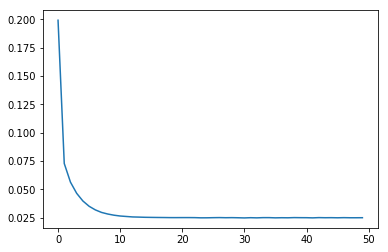

In [5]:
plt.plot(ada.cost_)
plt.show()